<a href="https://www.kaggle.com/code/dennismathewjose/customer-segmentation-using-rfm-analysis?scriptVersionId=208701198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


## Data Preprocessing

In [2]:
filepath = '/kaggle/input/ecommerce-data/data.csv'
data = pd.read_csv(filepath, encoding = 'ISO-8859-1')
copy_data = data.copy()

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
### Converting the Date Column to Date Type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
#Handling the missing values and negative values appropriately
data.loc[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
data.loc[data['Quantity']  < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
cleaned_data = data.dropna(subset = ['CustomerID'])
cleaned_data.loc[data['UnitPrice'] < 0]
cleaned_data.loc[cleaned_data['Quantity']  < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
cleaned_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
cleaned_data.loc[cleaned_data['Quantity']  < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
cleaned_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


## Exploratory Data Visualization

In [17]:
unique_customers = cleaned_data['CustomerID'].nunique()
print(f"There are {unique_customers} unique customers.")

There are 4372 unique customers.


In [18]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

customer_order_counts = cleaned_data.groupby('CustomerID')['InvoiceNo'].nunique()
fig = px.histogram(customer_order_counts, nbins=30, title="Distribution of Orders per Customer")
fig.show()

In [19]:
top_customers = customer_order_counts.nlargest(5).reset_index()
print(top_customers)

fig = px.bar(top_customers, x='CustomerID', y='InvoiceNo', title="Top 5 Customers by Order Count")
fig.show()


   CustomerID  InvoiceNo
0     14911.0        248
1     12748.0        224
2     17841.0        169
3     14606.0        128
4     13089.0        118


In [20]:
top_products = cleaned_data['Description'].value_counts().head(10).reset_index()
top_products.columns = ['Description', 'Count']

fig = px.bar(top_products, x='Description', y='Count', title="Top 10 Most Frequently Purchased Products")
fig.show()

In [21]:
average_price = cleaned_data['UnitPrice'].mean()
print(f"The average product price is {average_price:.2f}.")


The average product price is 3.46.


In [22]:
cleaned_data['Revenue'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']
revenue_per_product = cleaned_data.groupby('Description')['Revenue'].sum().reset_index()
top_revenue_product = revenue_per_product.nlargest(1, 'Revenue')
print(top_revenue_product)

fig = px.bar(revenue_per_product.nlargest(10, 'Revenue'), x='Description', y='Revenue', title="Top Revenue-Generating Products")
fig.show()


                   Description   Revenue
2780  REGENCY CAKESTAND 3 TIER  132870.4


/tmp/ipykernel_17/3390906176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
cleaned_data['DayOfWeek'] = cleaned_data['InvoiceDate'].dt.day_name()
day_order_counts = cleaned_data['DayOfWeek'].value_counts()

fig = px.bar(day_order_counts, x=day_order_counts.index, y=day_order_counts.values, title="Orders by Day of the Week")
fig.show()


/tmp/ipykernel_17/3661181103.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/3661181103.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month
month_order_counts = cleaned_data['Month'].value_counts().sort_index()

fig = px.line(x=month_order_counts.index, y=month_order_counts.values, title="Orders by Month")
fig.update_xaxes(title="Month")
fig.update_yaxes(title="Order Count")
fig.show()


/tmp/ipykernel_17/2975885121.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
top_countries = cleaned_data['Country'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Count']

fig = px.bar(top_countries, x='Country', y='Count', title="Top 5 Countries by Number of Orders")
fig.show()


In [26]:
average_order_value = cleaned_data.groupby('Country')['Revenue'].mean().reset_index()

fig = px.bar(average_order_value, x='Country', y='Revenue', title="Average Order Value by Country")
fig.show()


#### Payment Analysis

The dataset provided does not include any information about payment methods. To analyze the most common payment methods used by customers, you would need a dataset that includes a column like PaymentMethod, TransactionType, or something similar.

#### Customer Behavior

In [27]:
customer_activity = cleaned_data.groupby('CustomerID').agg(FirstPurchase=('InvoiceDate', 'min'), LastPurchase=('InvoiceDate', 'max')).reset_index()

customer_activity['ActiveDuration'] = (customer_activity['LastPurchase'] - customer_activity['FirstPurchase']).dt.days

average_active_duration = customer_activity['ActiveDuration'].mean()

print(f"The average active duration for customers is {average_active_duration:.2f} days.")

fig = px.histogram(customer_activity, x='ActiveDuration', nbins=30, title='Distribution of Customer Active Durations')
fig.update_layout(xaxis_title='Active Duration (days)', yaxis_title='Number of Customers')
fig.show()

The average active duration for customers is 133.39 days.


#### Are there any customer segments based on their purchase behavior?

Yes there are Customer segments based on their purchase behavior and are generated in the RFM section below.

In [28]:
# Identify orders with returns or refunds

# Check for negative quantities
returns_or_refunds = cleaned_data[(cleaned_data['Quantity'] < 0) | (cleaned_data['InvoiceNo'].str.startswith('C'))]

total_orders = cleaned_data['InvoiceNo'].nunique()

refund_orders = returns_or_refunds['InvoiceNo'].nunique()

refund_percentage = (refund_orders / total_orders) * 100

print(f"Percentage of orders with returns or refunds: {refund_percentage:.2f}%")

Percentage of orders with returns or refunds: 16.47%


In [29]:
import plotly.express as px

# Filter orders with negative Quantity (refunds/returns)
returns_or_refunds = cleaned_data[cleaned_data['Quantity'] < 0]

# Ensure that the InvoiceDate column is of datetime type
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

# Extract month and year for grouping (use other periods like week or day if needed)
returns_or_refunds['Month_Year'] = returns_or_refunds['InvoiceDate'].dt.to_period('M')

# Convert 'Month_Year' to string for easier plotting
returns_or_refunds['Month_Year'] = returns_or_refunds['Month_Year'].astype(str)

# Count the number of returns/refunds for each month
monthly_returns = returns_or_refunds.groupby('Month_Year').size().reset_index(name='Refund_Count')

# Create a bar plot for returns/refunds
fig = px.bar(monthly_returns, x='Month_Year', y='Refund_Count', 
             title='Returns/Refunds Count Over Time', labels={'Month_Year': 'Month/Year', 'Refund_Count': 'Number of Returns/Refunds'})

fig.update_xaxes(tickmode='array', tickvals=monthly_returns['Month_Year'])
fig.show()


/tmp/ipykernel_17/3902327782.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/3902327782.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/3902327782.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
returns_or_refunds = cleaned_data[cleaned_data['Quantity'] < 0]

category_returns = returns_or_refunds.groupby('Description').size().reset_index(name='Return_Count')

category_orders = cleaned_data.groupby('Description').size().reset_index(name='Total_Orders')

category_data = pd.merge(category_orders, category_returns, on='Description', how='left').fillna(0)

category_data['Return_Rate'] = category_data['Return_Count'] / category_data['Total_Orders']

category_data_sorted = category_data.sort_values(by='Return_Rate', ascending=False)

fig = px.bar(category_data_sorted, x='Description', y='Return_Rate', title='Return Rate by Product Category', labels={'Description':'Product Category','Return_Rate' : 'Return_Rate'},color='Return_Rate', color_continuous_scale='Viridis')

fig.update_xaxes(tickangle=90, tickmode='array')
fig.show()

In [31]:
cleaned_data['Sales'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

total_sales = cleaned_data['Sales'].sum()

#Estimate cost assuming a 30% profit margin
profit_margin = 0.30

cleaned_data['Cost'] = cleaned_data['Sales'] * (1 - profit_margin)

total_cost = cleaned_data['Cost'].sum()
total_profit = total_sales - total_cost

print(f"Total Cost: ${total_cost:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

print()

Total Cost: $5,810,046.07
Total Profit: $2,490,019.74



/tmp/ipykernel_17/4098414241.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/4098414241.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
cleaned_data['Sales'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

cleaned_data['Profit'] = cleaned_data['Sales'] * profit_margin

product_profit = cleaned_data.groupby('Description').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()
product_profit['Profit_Margin'] = (product_profit['Total_Profit'] / product_profit['Total_Sales'])

top_products = product_profit.sort_values(by='Profit_Margin', ascending=False).head(5)
print(top_products)


                             Description  Total_Sales  Total_Profit  \
3895    ZINC WIRE SWEETHEART LETTER TRAY       253.24        75.972   
1632               HEARTS WRAPPING TAPE          3.25         0.975   
425                      BLUE EGG  SPOON       258.72        77.616   
3478    TRADITIONAL WOODEN SKIPPING ROPE      9963.90      2989.170   
3477  TRADITIONAL WOODEN CATCH CUP GAME       3640.50      1092.150   

      Profit_Margin  
3895            0.3  
1632            0.3  
425             0.3  
3478            0.3  
3477            0.3  


/tmp/ipykernel_17/689228639.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/689228639.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
fig = px.bar(top_products, x='Description', y='Profit_Margin', title='Top 5 Products by Profit Margin', labels={'Description': 'Product', 'Profit_Margin': 'Profit Margin(%)'},text='Profit_Margin')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

#### Customer Feedback Proxy Metrics Dissatisfaction (Proxy):
* Use return/refund rates as a proxy for dissatisfaction. Products with higher return rates or more frequent refunds may indicate issues, such as poor quality or misrepresentation.

#### Customer Satisfaction (Proxy):
* High purchase quantities can indicate customer satisfaction. Customers who buy products in large quantities might be more satisfied or have strong preferences for those products.




In [34]:
import pandas as pd
import numpy as np

# Step 1: Calculate satisfaction and dissatisfaction scores

# Create Sales column
cleaned_data['Sales'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

# Satisfaction Rate (proxy: high purchase quantities, threshold = 50)
satisfaction_threshold = 50  # Quantity threshold for high satisfaction
satisfaction_data = cleaned_data[cleaned_data['Quantity'] >= satisfaction_threshold]
product_satisfaction = satisfaction_data.groupby('Description').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Sales=('Sales', 'sum')
).reset_index()
product_satisfaction['Avg_Satisfaction_Score'] = np.clip(
    product_satisfaction['Total_Quantity'] / product_satisfaction['Total_Quantity'].max() * 5, 0, 5)

# Dissatisfaction Rate (proxy: refund/return rates, negative quantities)
dissatisfaction_data = cleaned_data[cleaned_data['Quantity'] < 0]
product_dissatisfaction = dissatisfaction_data.groupby('Description').agg(
    Total_Returns=('Quantity', 'sum'),
    Total_Refunds=('Sales', 'sum')
).reset_index()
product_dissatisfaction['Avg_Dissatisfaction_Score'] = np.clip(
    abs(product_dissatisfaction['Total_Returns']) / abs(product_dissatisfaction['Total_Returns']).max() * 5, 0, 5)

# Merge satisfaction and dissatisfaction data
product_feedback = pd.merge(
    product_satisfaction[['Description', 'Avg_Satisfaction_Score']],
    product_dissatisfaction[['Description', 'Avg_Dissatisfaction_Score']],
    on='Description', how='outer'
).fillna(0)  # Fill missing scores with 0


/tmp/ipykernel_17/1824937184.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
import plotly.express as px

# Sort by highest satisfaction or dissatisfaction scores and filter top 20
top_feedback_products = product_feedback.nlargest(20, 'Avg_Dissatisfaction_Score')

# Create stacked bar chart for satisfaction and dissatisfaction
fig = px.bar(top_feedback_products, 
             x='Description', 
             y=['Avg_Satisfaction_Score', 'Avg_Dissatisfaction_Score'], 
             title='Satisfaction vs Dissatisfaction by Product (Top 20)',
             labels={'value': 'Score (Out of 5)', 'variable': 'Metric', 'Description': 'Product Name'},
             barmode='stack',  # Stacked bar chart
             height=600,
             color_discrete_map={'Avg_Satisfaction_Score': 'green', 'Avg_Dissatisfaction_Score': 'red'})

# Update x-axis for readability
fig.update_xaxes(tickangle=45)
fig.show()


## RFM Calculation

#### To calculate RFM (Recency, Frequency, and Monetary) metrics, follow these steps:

#### Steps to Calculate RFM:
#### 1. Prepare the Dataset
Ensure your dataset has the following columns:

##### CustomerID: Unique identifier for each customer.
##### InvoiceDate: Date of each transaction.
##### InvoiceNo: Unique identifier for each order.
##### Quantity: Number of items purchased.
##### UnitPrice: Price per unit of the product.
#### 2. Calculate RFM Metrics
##### Recency (R): Days since the last purchase.
##### Frequency (F): Total number of orders per customer.
##### Monetary (M): Total monetary value of purchases per customer.

In [36]:
import pandas as pd

# Add a total price column
cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

# Define a reference date for recency calculation (e.g., last transaction date in the dataset)
reference_date = cleaned_data['InvoiceDate'].max()

# Group by CustomerID to calculate RFM
rfm = cleaned_data.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

# Display the RFM metrics
print(rfm.head())

/tmp/ipykernel_17/996502868.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


### Explanation of the Code
#### Recency:
(reference_date - x.max()).days: Calculates the number of days since the last purchase for each customer.
#### Frequency:
'nunique' on InvoiceNo counts the number of unique orders per customer.
#### Monetary:
The sum of the TotalPrice column calculates the total revenue generated by each customer.

In [37]:
import plotly.express as px

# Recency Distribution
fig_recency = px.histogram(rfm, x='Recency', nbins=20, title='Distribution of Recency (R)')
fig_recency.update_xaxes(title='Days Since Last Purchase')
fig_recency.update_yaxes(title='Count of Customers')
fig_recency.show()


In [38]:

# Frequency Distribution
fig_frequency = px.histogram(rfm, x='Frequency', nbins=20, title='Distribution of Frequency (F)')
fig_frequency.update_xaxes(title='Number of Orders')
fig_frequency.update_yaxes(title='Count of Customers')
fig_frequency.show()


In [39]:
# Monetary Distribution
fig_monetary = px.histogram(rfm, x='Monetary', nbins=20, title='Distribution of Monetary Value (M)')
fig_monetary.update_xaxes(title='Total Monetary Value ($)')
fig_monetary.update_yaxes(title='Count of Customers')
fig_monetary.show()

## RFM Segmentation

#### Step 1: Assign RFM Scores
##### We will divide the Recency, Frequency, and Monetary metrics into quartiles (1–4):

- Recency: Lower scores (closer to 1) indicate recent purchases.
- Frequency: Higher scores (closer to 4) indicate frequent purchases.
- Monetary: Higher scores (closer to 4) indicate higher spending.

In [40]:
def assign_rfm_scores_with_cut(data, column, ascending=True):
    bins = pd.cut(data[column], bins=4, labels=[4, 3, 2, 1] if ascending else [1, 2, 3, 4])
    return bins

# Assign scores
rfm['R_Score'] = assign_rfm_scores_with_cut(rfm, 'Recency', ascending=False)
rfm['F_Score'] = assign_rfm_scores_with_cut(rfm, 'Frequency', ascending=True)
rfm['M_Score'] = assign_rfm_scores_with_cut(rfm, 'Monetary', ascending=True)


In [41]:
# Combine RFM scores into a single score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display the first few rows
print(rfm[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())

   CustomerID R_Score F_Score M_Score RFM_Score
0     12346.0       4       4       4       444
1     12347.0       1       4       4       144
2     12348.0       1       4       4       144
3     12349.0       1       4       4       144
4     12350.0       4       4       4       444


#### Step 2: Analyze RFM Segments
##### After calculating the scores, you can group customers into meaningful segments:

- Example Segments
- Champions (RFM Score: 444): Recent, frequent, and high spenders.
- Loyal Customers: High frequency and monetary, but not necessarily recent.
- At Risk: Used to spend often but haven’t made recent purchases.
- Lost Customers (RFM Score: 111): Old purchases, infrequent, and low spenders.

In [42]:
# Define RFM segments based on RFM scores
def segment_rfm(score):
    if score == '444':
        return 'Champion'
    elif score.startswith('44'):
        return 'Loyal'
    elif score.endswith('44'):
        return 'Big Spender'
    elif score.startswith('11'):
        return 'Lost'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_rfm)

# Display segment counts
print(rfm['Segment'].value_counts())

Segment
Big Spender    3998
Champion        356
At Risk          16
Lost              2
Name: count, dtype: int64


### Visualizations

In [43]:
import plotly.express as px

fig = px.pie(rfm, names='Segment', title='RFM Segment Distribution', hole=0.4)
fig.show()

In [44]:
import plotly.express as px

# Count customers in each segment
segment_count = rfm['Segment'].value_counts().reset_index()
segment_count.columns = ['Segment', 'Customer Count']

# Plot the segments
fig = px.bar(segment_count, x='Segment', y='Customer Count', color='Segment', 
             title='Customer Segmentation Based on RFM Scores')
fig.show()

In [45]:
# Calculate mean R, F, M scores by segment
segment_metrics = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Plot the metrics
fig = px.bar(segment_metrics, x='Segment', y=['Recency', 'Frequency', 'Monetary'], 
             title='Average RFM Metrics by Segment', barmode='group')
fig.show()

In [46]:
rfm_scores = rfm.groupby(['R_Score', 'F_Score']).size().reset_index(name='Count')

fig = px.density_heatmap(rfm_scores, x='R_Score', y='F_Score', z='Count', 
                         title='Heatmap of RFM Scores', color_continuous_scale='Viridis')
fig.show()

/tmp/ipykernel_17/3609140261.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Select RFM metrics for clustering
rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

# Check the scaled data
print(f"Scaled RFM Data: \n{rfm_scaled[:5]}")


Scaled RFM Data: 
[[ 2.32202285 -0.32936215 -0.23100099]
 [-0.89373323  0.20610242  0.29343167]
 [-0.1691956  -0.11517632 -0.01231622]
 [-0.72500529 -0.43645506 -0.01714563]
 [ 2.16322008 -0.43645506 -0.19031183]]


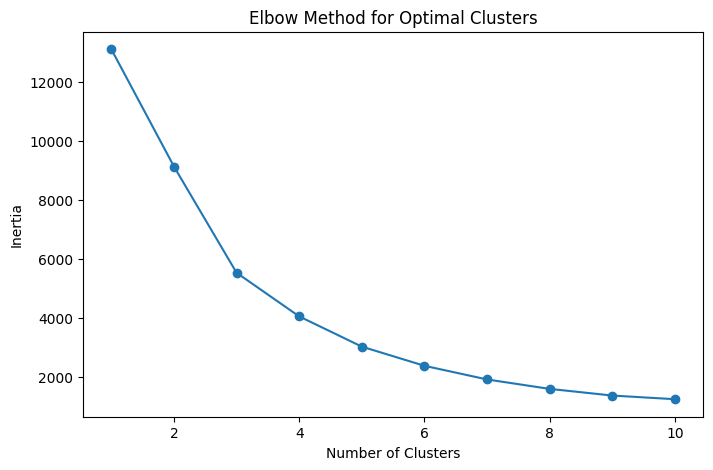

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Testing 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [49]:
# Apply K-Means with the chosen number of clusters
optimal_k = 4  # Replace with the number from the elbow method
kmeans = KMeans(n_clusters=optimal_k,n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Map clusters to meaningful names (optional)
rfm['Cluster'] = rfm['Cluster'].map({
    0: 'Low Value', 
    1: 'High Value', 
    2: 'Medium Value', 
    3: 'New Customers'
})


In [50]:
import plotly.express as px

# Create a scatter plot for visualizing clusters
fig = px.scatter(rfm, x='Recency', y='Monetary', color='Cluster', size='Frequency',
                 title='Customer Segmentation Using K-Means Clustering',
                 labels={'Cluster': 'Customer Cluster'})
fig.show()


In [51]:
# Count customers in each cluster
cluster_count = rfm['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'Customer Count']

# Bar plot of cluster distribution
fig = px.bar(cluster_count, x='Cluster', y='Customer Count', color='Cluster',
             title='Distribution of Customers Across Clusters')
fig.show()


#### Analyze and Interpret Results
##### Each cluster can be interpreted as follows:

- High Value: Frequent purchasers with high monetary value.
- Medium Value: Moderate frequency and spending.
- Low Value: Rare purchasers with low spending.
- New Customers: Recently joined but may show potential.

### Segment Profiling

In [52]:
# Grouping customers by segments and calculating descriptive statistics
segment_profile = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max'],
    'CustomerID': 'count'  # Number of customers in each segment
}).reset_index()

# Rename columns for better readability
segment_profile.columns = ['Cluster', 'R_mean', 'R_median', 'R_min', 'R_max', 
                           'F_mean', 'F_median', 'F_min', 'F_max', 
                           'M_mean', 'M_median', 'M_min', 'M_max', 
                           'Customer_Count']

print(segment_profile)


         Cluster      R_mean  R_median  R_min  R_max     F_mean  F_median  \
0     High Value    6.666667       4.0      0     23  89.000000      64.0   
1      Low Value   40.606500      30.0      0    162   4.802461       3.0   
2   Medium Value  246.951242     242.0    140    373   1.805888       1.0   
3  New Customers    8.181818       2.5      0    301  40.672727      31.0   

   F_min  F_max         M_mean    M_median      M_min      M_max  \
0     26    248  182181.981667  160027.395  113384.14  279489.02   
1      1     26    1478.515539     853.390   -1165.30   21024.01   
2      1     13     453.488888     296.880   -4287.63   21535.90   
3     14    224   18441.961455   11465.300    1296.44   88125.38   

   Customer_Count  
0               6  
1            3169  
2            1087  
3             110  


#### Based on the descriptive statistics, you can describe each segment's characteristics. For example:

##### High Value Segment:
- Low Recency (recent purchases), High Frequency, High Monetary values.
Loyal customers who spend frequently and recently.
##### Low Value Segment:
- High Recency (last purchase was long ago), Low Frequency, Low Monetary values.
Customers with minimal or no engagement.
##### Medium Value Segment:

- Mid-range values for Recency, Frequency, and Monetary metrics.
Casual customers who shop occasionally.
##### New Customers Segment:

- Low Frequency, Low Monetary but Low Recency.
Recent acquisitions who have yet to demonstrate loyalty.

In [53]:
# Separate box plots for Recency, Frequency, and Monetary metrics

# Recency
fig_recency = px.box(
    rfm,
    x='Cluster',
    y='Recency',
    title='Recency Distribution by Segment',
    labels={'Recency': 'Recency (Days)', 'Cluster': 'Segment'}
)
fig_recency.update_layout(
    yaxis=dict(title='Recency (Days)', range=[0, rfm['Recency'].max() * 1.1])
)
fig_recency.show()

In [54]:

# Frequency
fig_frequency = px.box(
    rfm,
    x='Cluster',
    y='Frequency',
    title='Frequency Distribution by Segment',
    labels={'Frequency': 'Frequency (Orders)', 'Cluster': 'Segment'}
)
fig_frequency.update_layout(
    yaxis=dict(title='Frequency (Orders)', range=[0, rfm['Frequency'].max() * 1.1])
)
fig_frequency.show()

In [55]:
# Monetary
fig_monetary = px.box(
    rfm,
    x='Cluster',
    y='Monetary',
    title='Monetary Distribution by Segment',
    labels={'Monetary': 'Monetary Value ($)', 'Cluster': 'Segment'}
)
fig_monetary.update_layout(
    yaxis=dict(title='Monetary Value ($)', range=[0, rfm['Monetary'].max() * 1.1])
)
fig_monetary.show()


#### Recency Box Plot:

Focuses on the distribution of Recency values by cluster.
Adjusts the y-axis to fit the maximum Recency values.
#### Frequency Box Plot:

Highlights the distribution of Frequency (order count) per cluster.
Adjusts the y-axis range specifically for Frequency.
#### Monetary Box Plot:

Displays the Monetary Value (spending) distribution across segments.
Sets the y-axis to match the scale of the Monetary values.

### Marketing Recommendation

#### 1. Champions (High R, High F, High M)
 Characteristics:

- These are the most valuable customers who purchase frequently, spend a lot, and have made recent purchases.
Strategies:

##### Loyalty Rewards: Offer exclusive discounts, loyalty points, or early access to new products to retain these customers.
- Upselling and Cross-Selling: Suggest premium or complementary products.
- Personalized Communication: Send thank-you emails or personalized recommendations based on their purchase history.
- Exclusive Access: Provide invitations to VIP events or access to beta testing of new products.

#### 2. Loyal Customers (Moderate R, High F, High M)
Characteristics:

- These customers are loyal and make frequent purchases, but their last purchase might not be recent.
##### Strategies:

- Win-Back Campaigns: Use email or SMS reminders with discounts to re-engage them.
- Subscription Programs: Introduce memberships or subscription services to keep them engaged.
- Feedback Collection: Ask for feedback on their experience to show their opinion matters.
- Bundled Offers: Encourage repeat purchases through bundled deals.

#### 3. Potential Loyalists (Low R, Moderate F, Moderate M)
Characteristics:

- Recently acquired customers who show potential to become loyal.
##### Strategies:

- Welcome Offers: Send a “thank you for joining” discount or special offer.
- Onboarding Campaigns: Provide educational content about your products/services to build trust.
- Engagement Campaigns: Use email drip campaigns to keep them interested and engaged.
- Incentives for Repeat Purchases: Offer discounts on their next purchase to establish a habit.
#### 4. At-Risk Customers (High R, Low F, Low M)
Characteristics:

- Previously active customers who haven’t purchased recently.
##### Strategies:

- Reactivation Campaigns: Send personalized win-back offers, such as “We Miss You!” discounts.
- Product Recommendations: Use past purchase history to recommend new or related items.
- Limited-Time Offers: Create urgency with flash sales or time-bound discounts.
- Survey Campaigns: Understand why they stopped buying and address those issues.
#### 5. Hibernating Customers (High R, Low F, Low M)
Characteristics:

- Customers who purchased a long time ago, infrequently, and with low spending.
##### Strategies:

- Low-Cost Engagement: Use cost-effective channels like social media ads to re-engage.
- Occasional Deals: Send seasonal promotions or holiday-specific offers.
- Highlight New Offerings: Show what’s new since they last purchased.
- Focus on Budget-Friendly Options: Market products at lower price points to encourage purchases.
#### 6. New Customers (Low R, Low F, Moderate M)
Characteristics:

- Recently acquired customers with low purchase frequency but moderate spending.
##### Strategies:

- Onboarding Program: Send a welcome email series introducing your brand and offerings.
- First Purchase Incentives: Encourage another purchase with “first repeat discount” offers.
- Nurturing Campaigns: Use storytelling in emails to build an emotional connection with the brand.
- Value Proposition: Highlight quality, service, or benefits to encourage trust.
#### 7. Low-Value Customers (Moderate R, Low F, Low M)
Characteristics:

- Customers with minimal engagement and spending.
##### Strategies:

- Cost-Effective Retention: Focus marketing efforts on automated email campaigns or SMS offers.
- Educational Content: Share content that shows how your products solve problems or improve their lives.
- Focus on Volume: Offer bulk discounts or promotions for buying multiple items.
- Gradual Upselling: Introduce moderately priced products to increase spending.
##### General Recommendations
- Leverage Data-Driven Personalization: Use RFM scores to send personalized offers and recommendations.
- Test Campaigns: Use A/B testing to determine which offers and communication styles resonate with each segment.
- Monitor Engagement: Continuously analyze customer behavior to adjust segmentation and strategies.
- Reward Loyalty: Implement a tier-based loyalty program rewarding consistent engagement.
